# Exploring data of NHL teams from the past 20 seasons (2002-2023)

## Import Libraries:
* numpy
* pandas
* matplotlib and/or seaborn
* alias dictionary
* scikit-learn

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
from encodings.aliases import aliases # dictionary of encoding names and associated alias
from sklearn.linear_model import LinearRegression # import linear model from scikit-learn
%matplotlib inline 

# Compiling the data
## Read in datasets: 

In [11]:
#Regular season Stats
df = pd.read_csv('/kaggle/input/nhl-team-stats-03-23/NHL_summary.csv')
#Playoff Stats
df2 = pd.read_csv('/kaggle/input/nhl-team-stats-03-23/NHL_playoff_data.csv')
df.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Team      640 non-null    object 
 1   Season    640 non-null    int64  
 2   GP        640 non-null    int64  
 3   W         640 non-null    int64  
 4   L         640 non-null    int64  
 5   T         640 non-null    object 
 6   OT        640 non-null    int64  
 7   P         640 non-null    int64  
 8   P%        640 non-null    float64
 9   RW        640 non-null    int64  
 10  ROW       640 non-null    int64  
 11  S/O Win   640 non-null    int64  
 12  GF        640 non-null    int64  
 13  GA        640 non-null    int64  
 14  GF/GP     640 non-null    float64
 15  GA/GP     640 non-null    float64
 16  PP%       640 non-null    float64
 17  PK%       640 non-null    float64
 18  Net PP%   640 non-null    float64
 19  Net PK%   640 non-null    float64
 20  Shots/GP  640 non-null    float6

## Merge/Join regular season and playoff into one dataframe. 
* I used an outer join to include the data for seasons where a team did not make the playoffs

In [12]:
#Merge df and df2 by the team and season to create df_merged
df_all = pd.merge(df, df2, how = 'outer', on=['Team','Season'])
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Team        640 non-null    object 
 1   Season      640 non-null    int64  
 2   GP_x        640 non-null    int64  
 3   W_x         640 non-null    int64  
 4   L_x         640 non-null    int64  
 5   T_x         640 non-null    object 
 6   OT_x        640 non-null    int64  
 7   P_x         640 non-null    int64  
 8   P%_x        640 non-null    float64
 9   RW_x        640 non-null    int64  
 10  ROW_x       640 non-null    int64  
 11  S/O Win_x   640 non-null    int64  
 12  GF_x        640 non-null    int64  
 13  GA_x        640 non-null    int64  
 14  GF/GP_x     640 non-null    float64
 15  GA/GP_x     640 non-null    float64
 16  PP%_x       640 non-null    float64
 17  PK%_x       640 non-null    float64
 18  Net PP%_x   640 non-null    float64
 19  Net PK%_x   640 non-null    f

# Data cleaning. 
## Add Playoff column 
* Indicate if a team made the playoffs that season (Yes or No)

## Altered Season column:
* Initially it displayed both years the season took place (ie 2003 start of the season would show 20032004) Removed the second year to make it easier to manage for time-series.

In [13]:
df_all['Playoffs'] = df_all['GP_y'].apply(lambda x: 'No' if pd.isnull(x) else 'Yes')

df_all['Season'] = df_all['Season'].apply(lambda x : str(x)[:4])
df_all.head(10)

,Team,Season,GP_x,W_x,L_x,T_x,OT_x,P_x,P%_x,RW_x,...,GF/GP_y,GA/GP_y,PP%_y,PK%_y,Net PP%_y,Net PK%_y,Shots/GP_y,SA/GP_y,FOW%_y,Playoffs
0,Edmonton Oilers,2015,82,31,43,--,8,70,0.427,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1,Arizona Coyotes,2016,82,30,42,--,10,70,0.427,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
2,Washington Capitals,2005,82,29,41,--,12,70,0.427,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,Arizona Coyotes,2017,82,29,41,--,12,70,0.427,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,New Jersey Devils,2016,82,28,40,--,14,70,0.427,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
5,Washington Capitals,2006,82,28,40,--,14,70,0.427,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
6,Arizona Coyotes,2022,82,28,40,--,14,70,0.427,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
7,Florida Panthers,2002,82,24,36,13,9,70,0.427,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
8,Colorado Avalanche,2008,82,32,45,--,5,69,0.421,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
9,Vancouver Canucks,2016,82,30,43,--,9,69,0.421,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


## Remove shortened seasons
There are some edge cases where shortened seasons cause significant outliers in our data. I created another df (df_cleaned) with seasons where teams played 82 games (typical season length) in the regular season.

In [14]:
df_cleaned = df_all[df_all['GP_x']==82]

# Findings: 

In [15]:
playoff_point_median = df_cleaned.loc[df_cleaned['Playoffs'] == 'Yes','P%_x'].median()
non_playoff_point_median = df_cleaned.loc[df_cleaned['Playoffs'] == 'No','P%_x'].median()
print('Median point percent for teams that made the playoffs: ' + str(round(playoff_point_median*100, 2)) + '%')
print('Median point percent for teams that did not make the playoffs: ' + str(round(non_playoff_point_median*100, 2)) + '%')

Median point percent for teams that made the playoffs: 61.6%
Median point percent for teams that did not make the playoffs: 48.2%


## Boxplot point percentage Playoff VS Non Playoff 

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


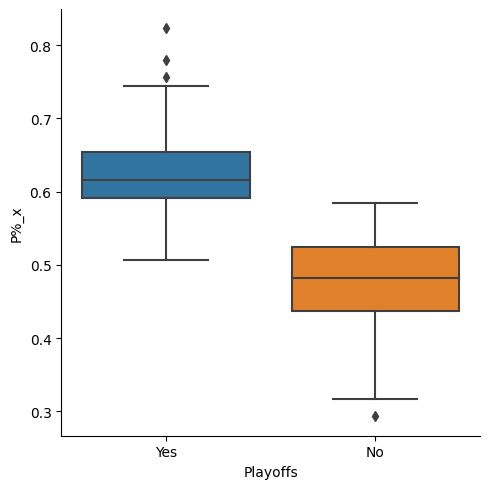

In [16]:
box_plot = sns.catplot(data=df_cleaned, x="Playoffs", y="P%_x", order=['Yes','No'], kind='box')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


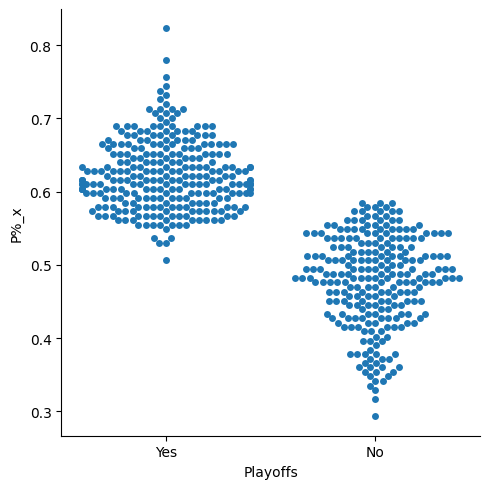

In [17]:
sns.catplot(data=df_cleaned, x="Playoffs", y="P%_x", order =['Yes','No'], kind = 'swarm')